## UNDERSTANDING THE DATA SET OF TITANIC
#BY - NAMRATA ATHAWALE
# UNDERSTAND THE SURVIVAL PATTERN OF THE PASSENGERS

In [2]:
#importing all the necessary libraries for the EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Load a CSV file into a DataFrame.
df = pd.read_csv('titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.shape
#The data set has total 418 rows and 12 columns

(418, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.memory_usage(deep=True)

,0
Index,132
PassengerId,3344
Survived,3344
Pclass,3344
Name,35314
Sex,25802
Age,3344
SibSp,3344
Parch,3344
Ticket,26700


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


**object columns** - NAME , SEX , TICKET ,CABIN, EMBARKED.

**INT COL**- PASSENGERID, SURVIVED, PCLASS, SIBSP,PARCH

**FLOAT COL** - AGE, FARE

---

**COLUMNS TO CHANGE THE DATATYPE AND REASON-**
 *AGE*(FLOAT - INT)TO MAKE IT LESS COMPLEX AND
EASY FOR DECISION MAKING.


In [9]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


There are about 86 null values in the age columns which we can replace with the mean age so it does not greatly affect the dataset pattern as there 327 missing values in the cabin column it is better to drop it as most of it are null.

In [10]:
df= df.drop('Cabin',axis=1)

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

removed cabin column

In [12]:
df['Age']= df['Age'].fillna(df['Age'].mean()).astype(int)

In [13]:
df.duplicated().sum()

np.int64(0)

there are no duplicaates

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.191388,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.654104,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


So we have a target variable survived,about **36% survived**  in the dataset.
mostly the passengers were from **2nd or 3rd class**.
the average **age of people was 30** about 75% people were below 35 age .
mostly people traveled alone .mostly passenger travelled without parents or children.
fare paid for the ticket has high variation some fares are very high(512).median fare =14 which means that **most people paid low fares**.



In [15]:
df.describe(include=['object'])

,Name,Sex,Ticket,Embarked
count,418,418,418,418
unique,418,2,363,3
top,"Peter, Master. Michael J",male,PC 17608,S
freq,1,266,5,270


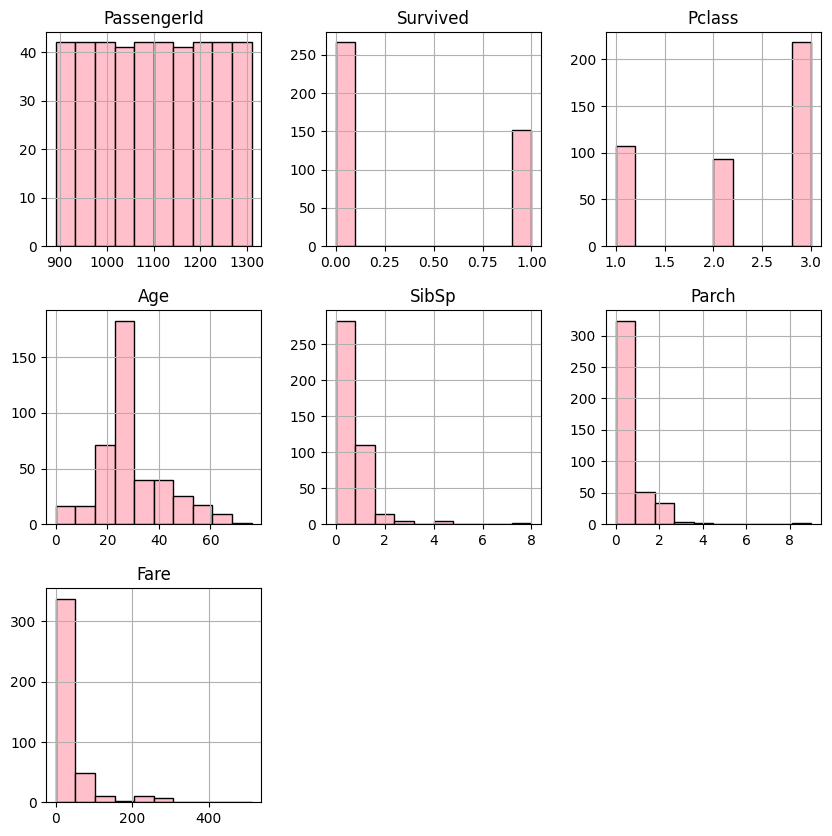

In [41]:
df.hist(figsize=(10,10),color='pink',edgecolor='black')
plt.show()

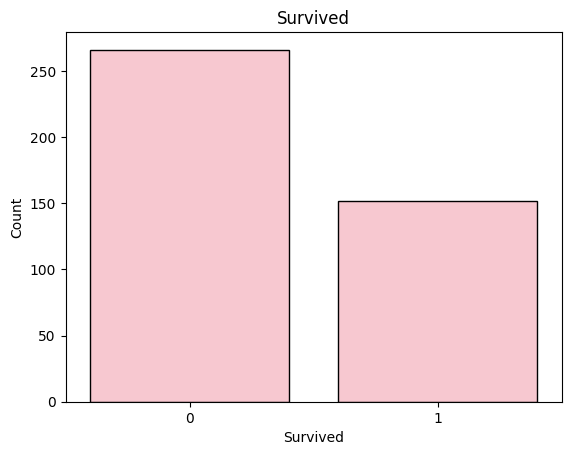

In [36]:
sns.countplot(x='Survived',data=df,color= 'pink',edgecolor='black')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survived')
plt.show()

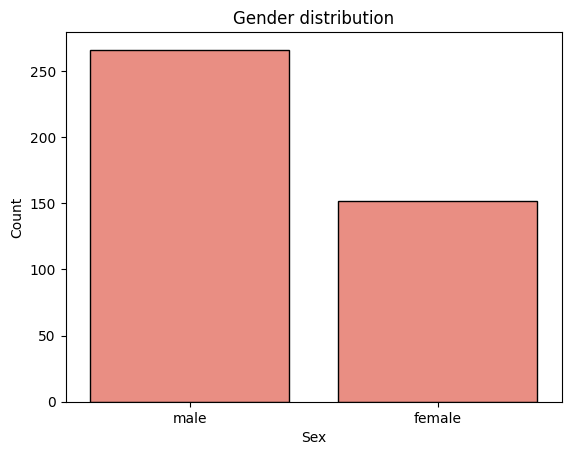

In [52]:
sns.countplot(x='Sex',data=df,color='Salmon',edgecolor='black')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Gender distribution')
plt.show()

There were mostly male passenger.


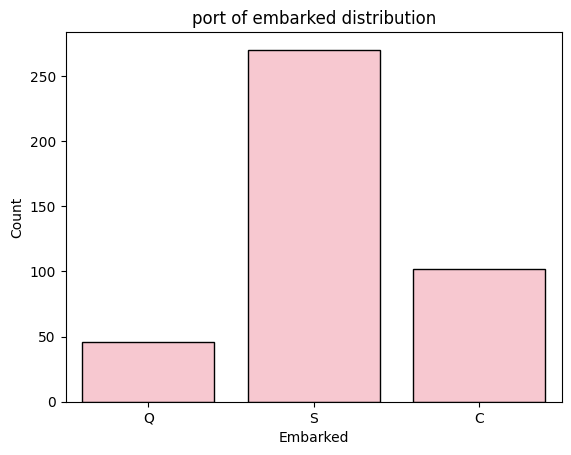

In [38]:
sns.countplot(x='Embarked',data = df,color= 'pink',edgecolor='black')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('port of embarked distribution')
plt.show()

majority peopleembarked from Southampton.

In [20]:
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print(survival_by_sex)

Sex
female    1.0
male      0.0
Name: Survived, dtype: float64


all females survived.

In [21]:
survival_by_embarked = df.groupby('Embarked')['Survived'].mean()
print(survival_by_embarked)

Embarked
C    0.392157
Q    0.521739
S    0.325926
Name: Survived, dtype: float64


passenger embarked from queenstone were survived in most amount.maybe rich passenger embarked here.

In [22]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print(survival_by_class)

Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64


if from class 1 survival chances are more as compared to 2 and 3 class people.

In [23]:
#create age bins
df['agegroup'] = pd.cut(df['Age'],bins = [0,12,18,35,60,100],labels = ['child','teen','young adult','adult','old'])

In [24]:
survival_by_age = df.groupby('agegroup')['Survived'].mean()
print(survival_by_age)

agegroup
child          0.500000
teen           0.406250
young adult    0.335938
adult          0.389474
old            0.400000
Name: Survived, dtype: float64


<ipython-input-24-b55001bfa94c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df.groupby('agegroup')['Survived'].mean()


Children,teen,old people were saved more high risk were people in their young adult or adult age.

In [25]:
num_df = df.select_dtypes(include=['int64','float64'])

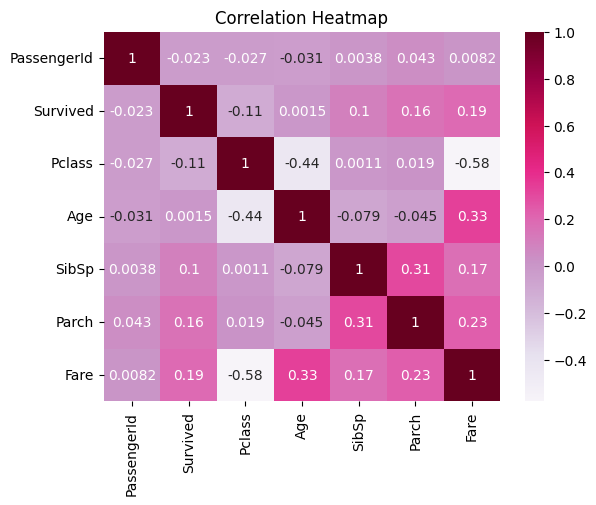

In [45]:
corr_matrix = num_df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='PuRd')
plt.title('Correlation Heatmap')
plt.show()


From the correlation heatmap, we observe that Fare has a moderate negative correlation with Pclass (-0.58), indicating that passengers in higher classes paid significantly higher fares. Pclass shows a weak negative correlation with Survived (-0.11), suggesting that passengers in higher classes were slightly more likely to survive. Fare also has a weak positive correlation with Survived (0.19), implying that passengers who paid higher fares had slightly better chances of survival.

Additionally, Parch and SibSp have a positive correlation (0.31), meaning passengers often traveled with both siblings and parents/children. Other features like Age, SibSp, and Parch show very weak correlation with survival, indicating limited direct influence individually.

PassengerId has no meaningful correlation with any variable, confirming it as just an identifier without predictive value.

Overall, Fare and Pclass emerge as relatively more important features for predicting survival based on the correlation analysis.

